Importing Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os

main_dir = r"C:\Users\KIIT\Desktop\Project\RPr\Covid19\DataSet"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [3]:
# MAKING SEPERATE FILES : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

Data Visualization

['C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (1).jpeg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (1).png', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (10).jpeg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (101).jpg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (107).jpg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (11).jpeg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (11).jpg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\COVID19\\COVID-19 (12).jpeg']
['C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\NORMAL\\NORMAL(0).jpg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\DataSet\\train\\NORMAL\\NORMAL(1).jpg', 'C:\\Users\\KIIT\\Desktop\\Project\\RPr\\Covid19\\Data

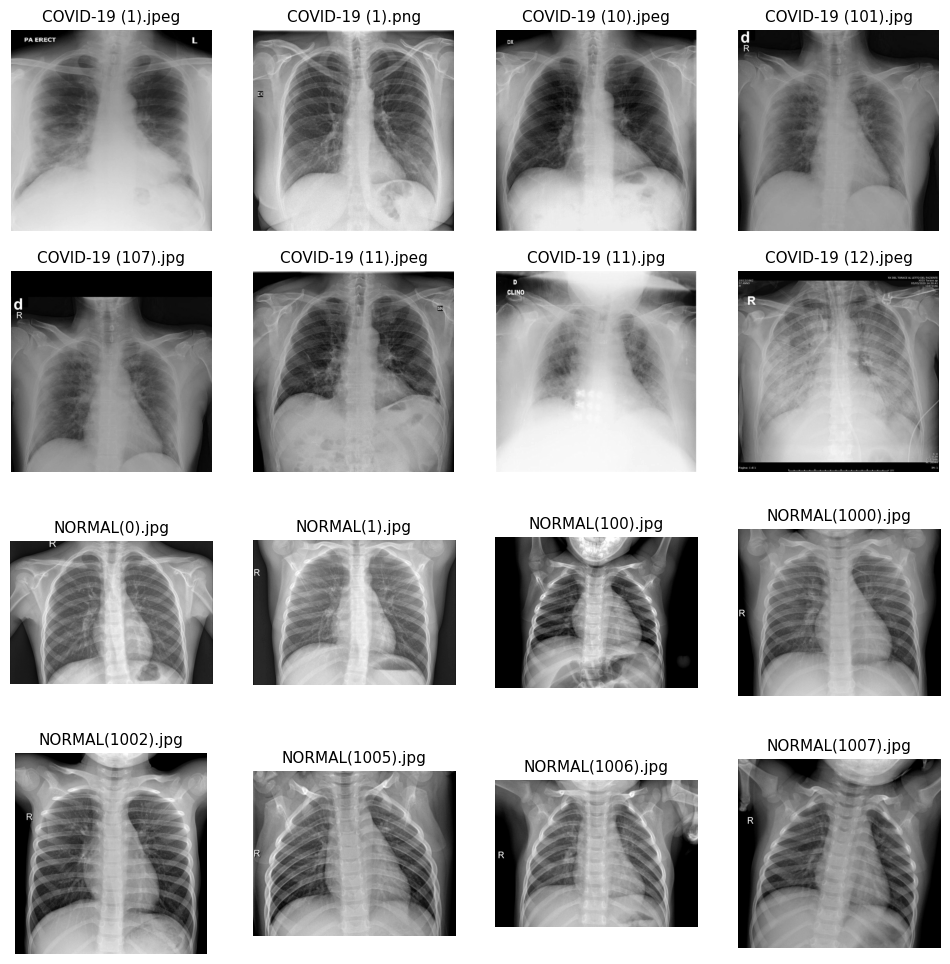

In [4]:
rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
    title = os.path.basename(img_path)  # This extracts the filename
    plot = plt.subplot(rows, columns, i+1)
    plot.axis("Off")
    img = mpimg.imread(img_path)
    plot.set_title(title, fontsize=11)
    plt.imshow(img, cmap="gray")

plt.show()

Data Processing and Augmentation

In [5]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [6]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


Buliding CNN Model

In [7]:
model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

In [10]:
# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

In [11]:
# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

In [13]:
# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

In [14]:
# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

In [15]:
# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

In [16]:
# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
### PRINTING MODEL SUMMARY
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,429,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

Compling and Training the CNN

In [18]:
#Compile
model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
#Training The Model
history = model.fit(train_generator, 
                    epochs = 35, 
                    validation_data = validation_generator)

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6286 - loss: 1.7065

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.6308 - loss: 1.6885 - val_accuracy: 0.8840 - val_loss: 0.3466
Epoch 2/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.8919 - loss: 0.2880 - val_accuracy: 0.9116 - val_loss: 0.2121
Epoch 3/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.9255 - loss: 0.1885 - val_accuracy: 0.9558 - val_loss: 0.1278
Epoch 4/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.9466 - loss: 0.1374 - val_accuracy: 0.9475 - val_loss: 0.1200
Epoch 5/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.9566 - loss: 0.1297 - val_accuracy: 0.9392 - val_loss: 0.1493
Epoch 6/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.9517 - loss: 0.1746 - val_accuracy: 0.9696 - val_loss: 0.0889
Epoch 7/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 0.9695 - loss: 0.0878 - val_accuracy: 0.9558 - val_loss: 0.1137
Epoch 8/35
46/46 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.9718 - loss: 0.0962 - val_accuracy: 0.9696 - val_loss: 0.

Performing Evaluation

In [20]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

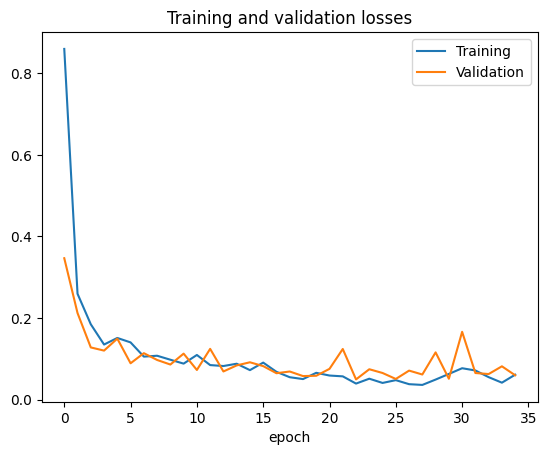

In [21]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

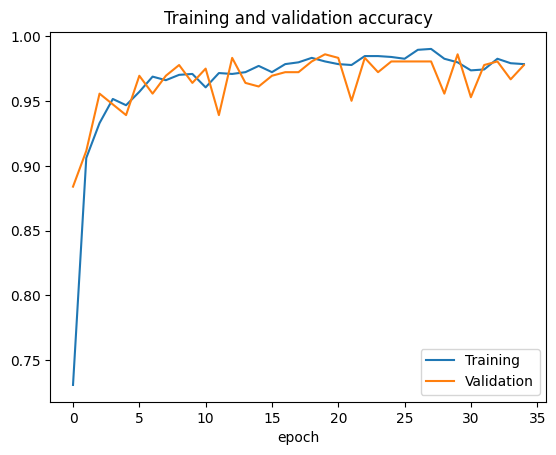

In [22]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [23]:
# GETTING TEST ACCURACY AND LOSS
test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9796 - loss: 0.0802
Test Set Loss :  0.06484116613864899
Test Set Accuracy :  0.9834710955619812


Prediction On New Data

In [ ]:
import tkinter as tk
from tkinter import filedialog
from keras.preprocessing import image
import numpy as np

# Initialize tkinter
root = tk.Tk()
root.withdraw()  # Close the root window

# Open file dialog to select an image
file_path = filedialog.askopenfilename()

if file_path:
    img = image.load_img(file_path, target_size=(150, 150))  # Load an image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions
    img_array /= 255.0  # Rescale
    
    # Make the prediction
    prediction = model.predict(img_array)
    predicted_class = prediction[0][0]  # Get the output
    
    # Classification based on the threshold
    if predicted_class > 0.6890:
        print("The report is COVID-19 Negative") 
    else:
        print("The report is COVID-19 Positive")
else:
    print("No file selected.")